In [ ]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 109.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=01c5f07a612efe1ea85d6d98a90c12ed16c2b04f20dec0a45123c0db2f6115c4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dropping RowNumber, CustomerId and Surname from the dataset as it belongs to particular people

In [ ]:
dataset = dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Check if there is any null value in the dataset

In [ ]:
dataset.isnull().values.any()

False

Getting unique values of Geography

In [ ]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Influence of Geography on the data

In [ ]:
dataset.groupby('Geography').mean(numeric_only = True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


Influence of Gender on the data

In [ ]:
dataset.groupby('Gender').mean(numeric_only = True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


* It can be observed from the analysis that Creditscore, Balance and EstimatedSalary of both male and female customers of the bank are almost equal





Getting average age of the customers who exited

In [ ]:
print(dataset[dataset['Exited'] == 1].mean(numeric_only = True)['Age'])

44.8379970544919


In [ ]:
# Max age of a person who exited
print(max(dataset[dataset['Exited'] ==1]['Age']))

84


Analysing the percentage of Customers who stayed vs who exited



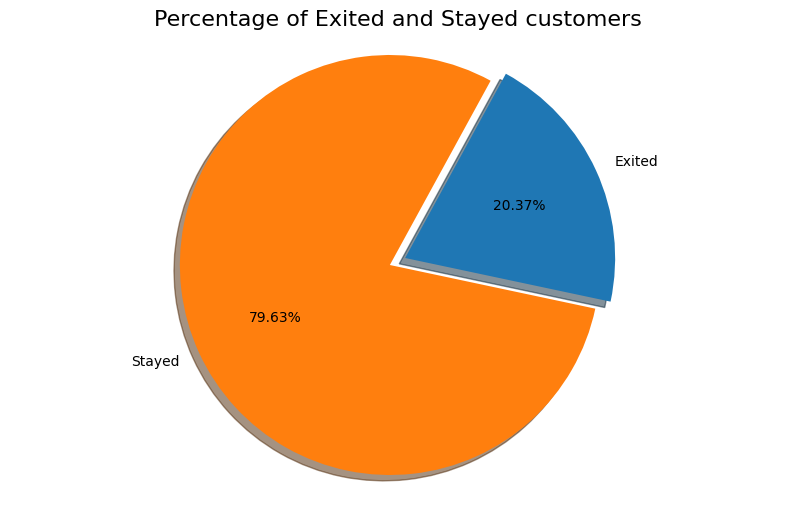

In [ ]:
labels = 'Exited', 'Stayed'
explode = (0, 0.08)
sizes = [dataset[dataset['Exited']==1]['Exited'].count(), dataset[dataset['Exited']==0]['Exited'].count()]
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.2f%%',
        shadow=True, startangle=-12)
ax1.axis('equal')
plt.title("Percentage of Exited and Stayed customers", size = 16)
plt.show()

Checking the relation of target variable with categorical variables


<Axes: xlabel='IsActiveMember', ylabel='count'>

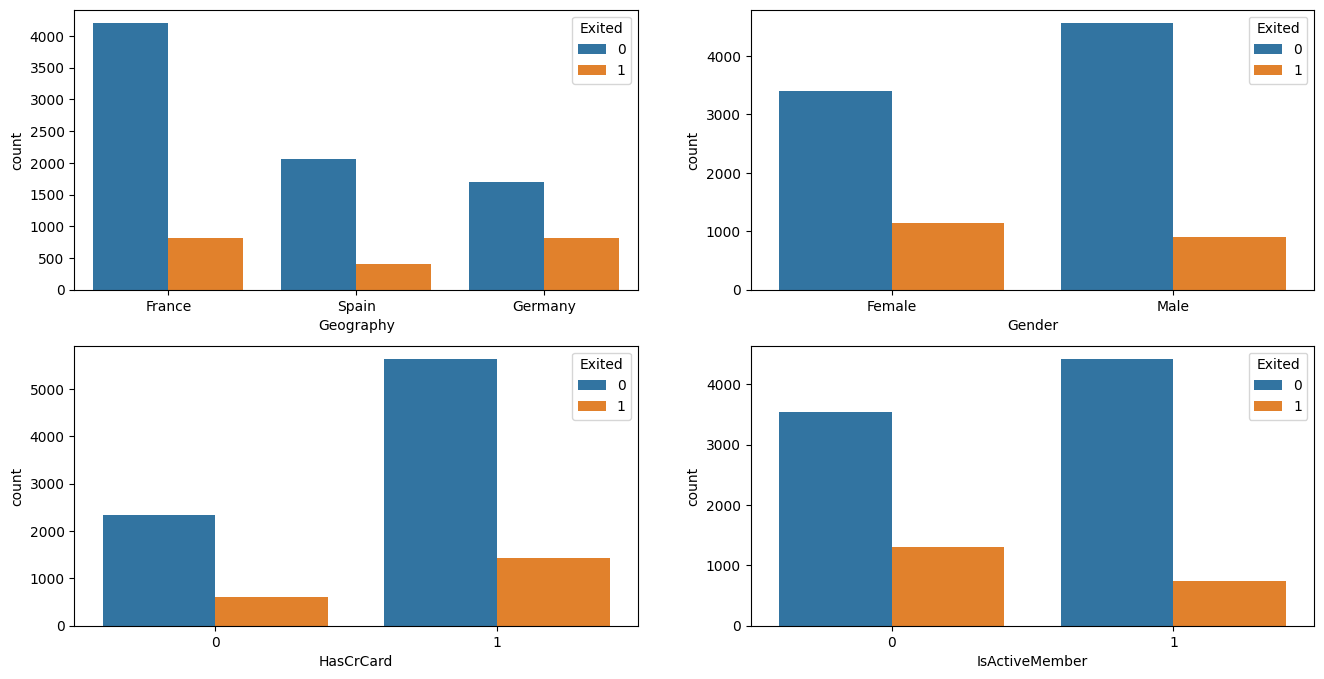

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 8))

sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

Checking the relation of target with numerical data

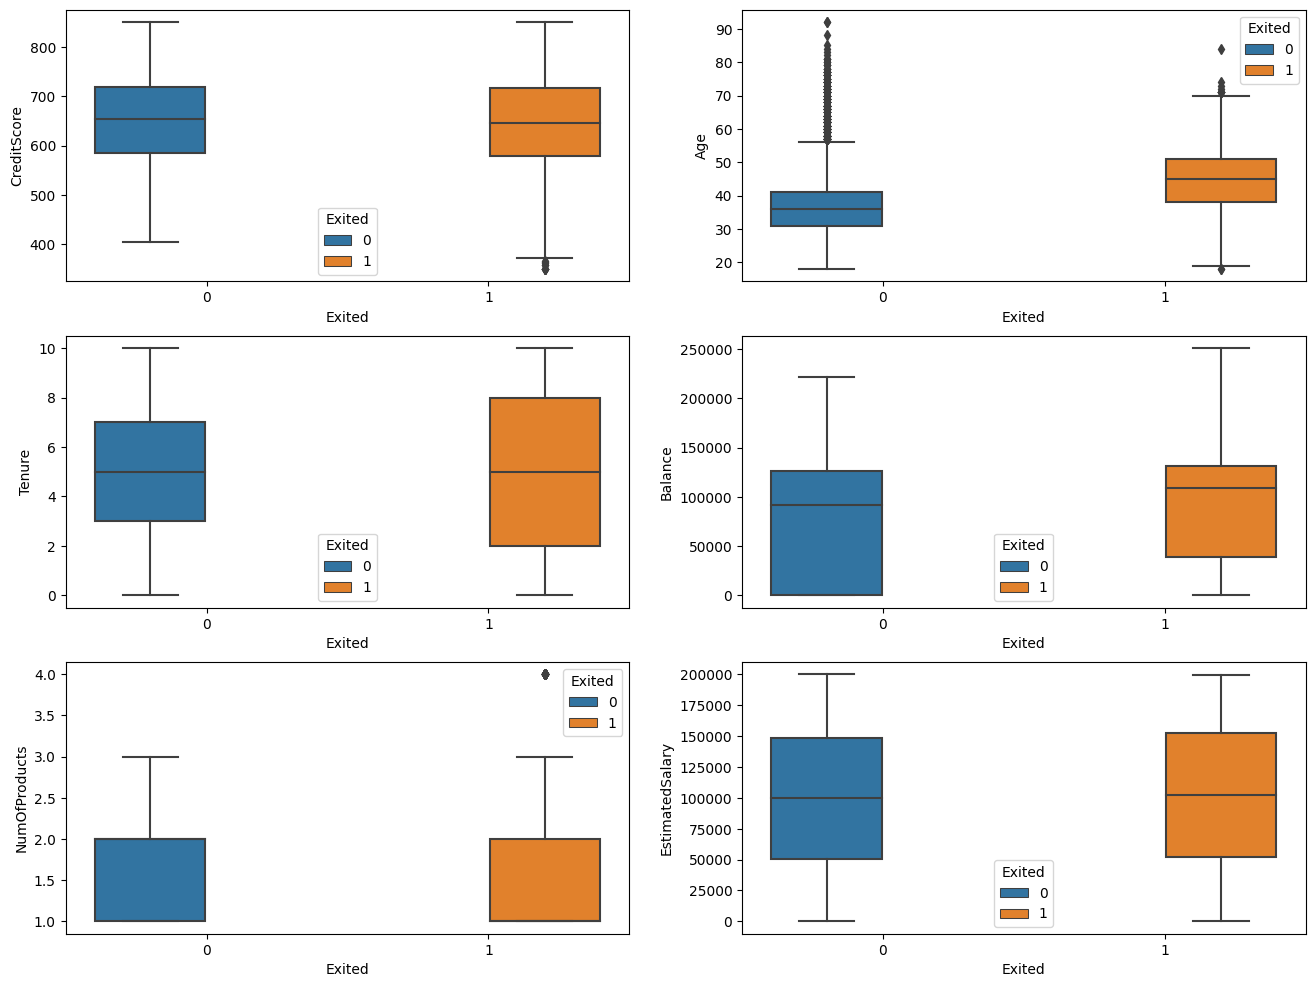

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(16, 12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=dataset, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=dataset, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=dataset, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=dataset, ax=axarr[2][1])

plt.subplots_adjust(hspace=0.2)

 Checking the Balance vs Estimated salary ratio

In [ ]:
dataset['BalancePerSalary'] = dataset['Balance']/dataset['EstimatedSalary']

(-1.0, 5.0)

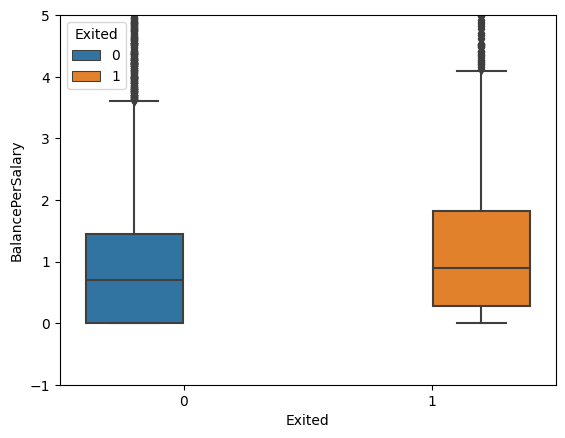

In [ ]:
sns.boxplot(y='BalancePerSalary',x = 'Exited', hue = 'Exited',data = dataset)
plt.ylim(-1, 5)

> As seen above customer churning is very less affected by the salary. But as per the new Balance-Salary Ratio, it can be seen that, customer with higher Balance-Salary Ratio are leaving the bank, which is concerning as it affects their source of loan capital

Credit Score as per Age

In [ ]:
dataset['CerditscoreGivenAge'] = dataset['CreditScore']/dataset['Age']

One Hot Encoding Geography and Gender column

In [ ]:
data = pd.get_dummies(data=dataset, drop_first=True)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancePerSalary,CerditscoreGivenAge,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,14.738095,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,14.829268,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,11.952381,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,17.923077,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,19.767442,0,1,0


Finding the correlation between features and Exited column

<Axes: >

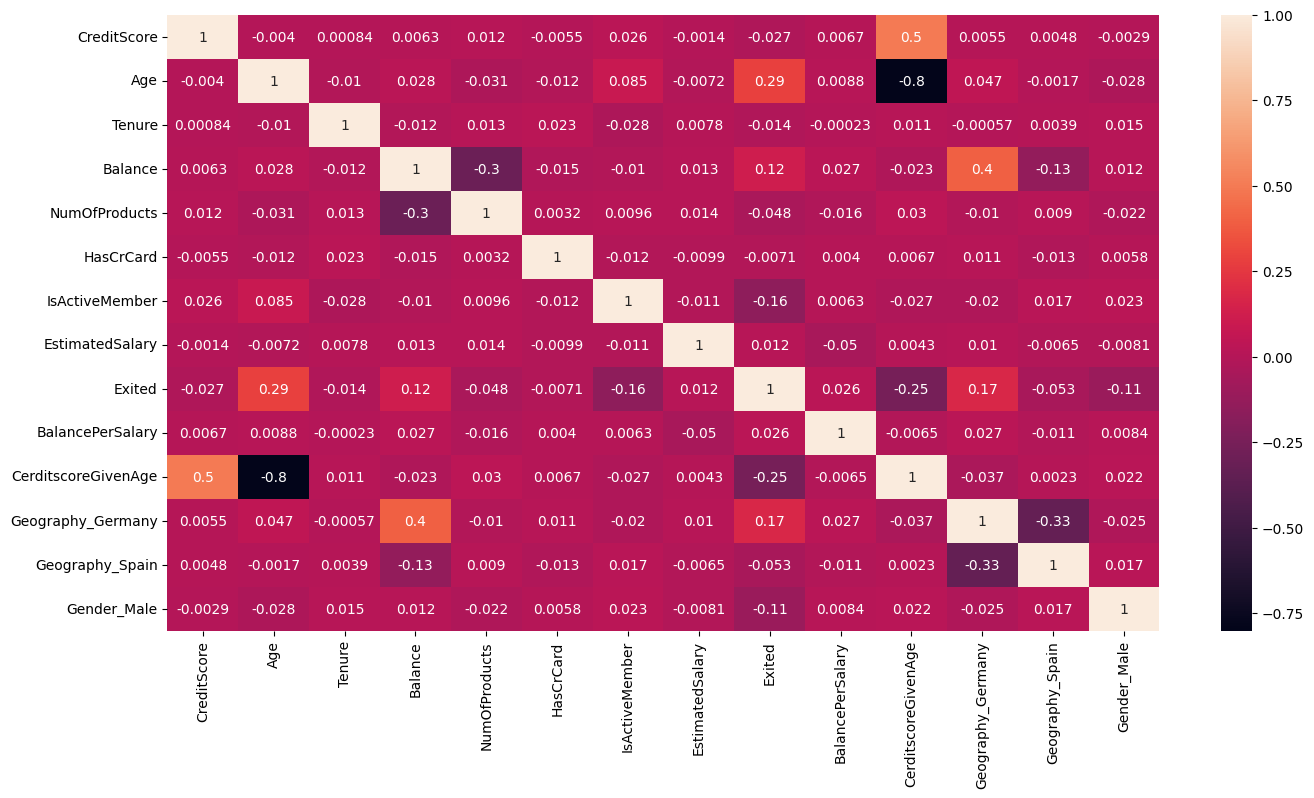

In [ ]:
corr = data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr,annot=True)

> From the heatmap it can be seen that Age and Balance are correlated with Exited feature. It is also observed that most of the customers leaving the bank are from Germany

Exited is our target column. Removing the column from the main dataset

In [ ]:
X = data.drop(columns ='Exited')
y = dataset['Exited']

Splitting the dataset for Training and Testing where 70% of the dataset is used for training the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 13), (3000, 13), (7000,), (3000,))

Scaling the data

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.34459497, -0.65674999, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       [-0.09518109, -0.46637979,  0.69816249, ...,  1.73734559,
        -0.57779016, -1.09823226],
       [-0.94734518, -0.56156489,  0.35138484, ..., -0.57559072,
        -0.57779016,  0.91055421],
       ...,
       [ 0.86090545, -0.08563939, -1.38250341, ..., -0.57559072,
        -0.57779016, -1.09823226],
       [ 0.15423279,  0.39028611,  1.04494014, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [ 0.46600014,  1.1517669 , -1.38250341, ...,  1.73734559,
        -0.57779016,  0.91055421]])

In [ ]:
X_test

array([[-0.5836166 , -0.65674999, -0.68894811, ...,  1.73734559,
        -0.57779016,  0.91055421],
       [-0.30302599,  0.39028611, -1.38250341, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-0.53165538,  0.48547121, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       ...,
       [-0.44851742, -0.65674999,  0.69816249, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-0.74989252, -0.75193509, -1.03572576, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-1.23832804, -1.60860099,  1.73849544, ...,  1.73734559,
        -0.57779016, -1.09823226]])

###Logistic Regression

In [ ]:
# initializing Logistic Regression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_y_pred = lr.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, lr_y_pred)
f1 = f1_score(y_test, lr_y_pred)
prec = precision_score(y_test, lr_y_pred)
rec = recall_score(y_test, lr_y_pred)

In [ ]:
# Getting the Results

results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results

,Model,accuracy,f1,precision,recall
0,Logistic Regression,0.821333,0.331671,0.610092,0.22774


In [ ]:
cm = confusion_matrix(y_test, lr_y_pred)
print(cm)

[[2331   85]
 [ 451  133]]


In [ ]:
# Cross Validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)

accuracies

array([0.80857143, 0.80428571, 0.80428571, 0.81      , 0.82285714,
       0.81142857, 0.80857143, 0.82714286, 0.81857143, 0.82142857])

In [ ]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 81.37%
Standard Deviation is 0.77%


###Random Forest

In [ ]:
classifier_rf = RandomForestClassifier(random_state=0)

In [ ]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
rf_y_pred = classifier_rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)
prec = precision_score(y_test, rf_y_pred)
rec = recall_score(y_test, rf_y_pred)

In [ ]:
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                             columns=["Model", "accuracy", "f1", "precision", "recall"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall
0,Logistic Regression,0.821333,0.331671,0.610092,0.227740
1,Random Forest,0.864667,0.566239,0.752841,0.453767
2,Random Forest,0.864667,0.566239,0.752841,0.453767


In [ ]:
cm = confusion_matrix(y_test, rf_y_pred)
print(cm)

[[2329   87]
 [ 319  265]]


In [ ]:
# Cross Validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_rf, X=X_train, y=y_train, cv=10)

accuracies

array([0.85      , 0.85857143, 0.86571429, 0.84714286, 0.85285714,
       0.86428571, 0.86428571, 0.86714286, 0.85285714, 0.85571429])

In [ ]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 85.79%
Standard Deviation is 0.68%


###XGBoost Classifier

In [ ]:
classifier_xgb = XGBClassifier()

In [ ]:
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_y_pred = classifier_xgb.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, xgb_y_pred)
f1 = f1_score(y_test, xgb_y_pred)
prec = precision_score(y_test, xgb_y_pred)
rec = recall_score(y_test, xgb_y_pred)

In [ ]:
model_results = pd.DataFrame([['XGBoost', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall
0,Logistic Regression,0.821333,0.331671,0.610092,0.227740
1,Random Forest,0.864667,0.566239,0.752841,0.453767
2,Random Forest,0.864667,0.566239,0.752841,0.453767
3,XGBoost,0.862000,0.580122,0.711443,0.489726


In [ ]:
cm = confusion_matrix(y_test, xgb_y_pred)
print(cm)

[[2300  116]
 [ 298  286]]


In [ ]:
accuracies = cross_val_score(estimator=classifier_xgb, X=X_train, y=y_train, cv=10)

accuracies

array([0.84428571, 0.84142857, 0.85142857, 0.85285714, 0.87      ,
       0.86      , 0.85285714, 0.85285714, 0.84428571, 0.83857143])

In [ ]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 85.09%
Standard Deviation is 0.89%


###Adjusting the Parameters of Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False],
    'max_features': ['sqrt'],  # Set max_features explicitly to 'sqrt'
}

In [ ]:
random_search = RandomizedSearchCV(estimator=classifier_rm,
                                   param_distributions=parameters,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=5,
                                   verbose=3)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 9, 11, 13],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=15, n_estimators=200, random_state=0)

In [ ]:
random_search.best_score_

0.8592925330776702

In [ ]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': False}

In [ ]:
classifier = RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=15, n_estimators=200, random_state=0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=15, n_estimators=200, random_state=0)

In [ ]:
rfp_y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, rfp_y_pred)
f1 = f1_score(y_test, rfp_y_pred)
prec = precision_score(y_test, rfp_y_pred)
rec = recall_score(y_test, rfp_y_pred)

In [ ]:
model_results = pd.DataFrame([['Random Forest Final', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall
0,Logistic Regression,0.821333,0.331671,0.610092,0.227740
1,Random Forest,0.864667,0.566239,0.752841,0.453767
2,Random Forest,0.864667,0.566239,0.752841,0.453767
3,XGBoost,0.862000,0.580122,0.711443,0.489726
4,Random Forest Final,0.868333,0.565457,0.790769,0.440068


In [ ]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
accuracies

array([0.86357143, 0.86071429, 0.86357143, 0.86214286, 0.855     ])

In [ ]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 86.10%
Standard Deviation is 0.32%


###Making the Predictions

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancePerSalary,CerditscoreGivenAge,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,14.738095,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,14.829268,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,11.952381,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,17.923077,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,19.767442,0,1,0


In [ ]:
single_obs_1=[[608, 41, 1, 83807.86, 1, 0, 1, 112542.58, 0.744677, 14.829268, 0, 1, 0]]

In [ ]:
classifier.predict(sc.transform(single_obs_1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])